# Monte Carlo simulation of a 2D Random walk#
Behorende bij sectie 1.6 boek Casquilho

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

## Single 2D Random Walk ##
Een eenvoudige Random walk in 2 dimensies op een rechthoekig grid met gelijke stapgrootte. Elke richting heeft eenzelfde kans.  

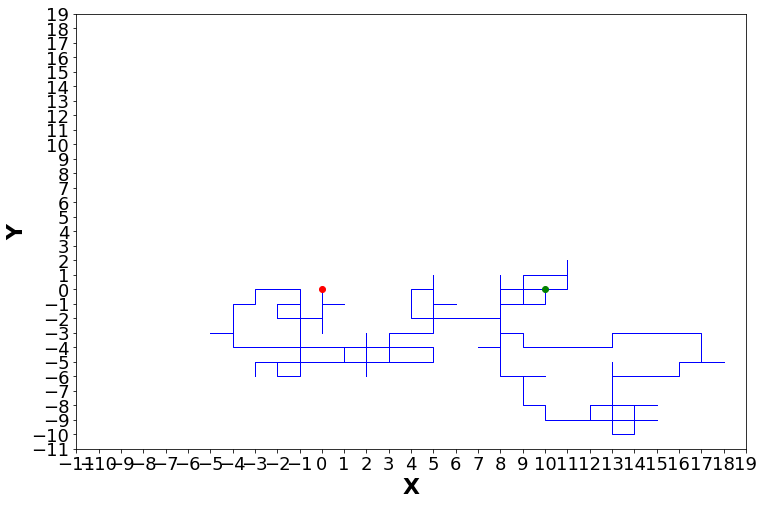

In [3]:
#1. Initialisatie
x=0    # start positie
y=0
N=200  # aantal stappen in de RW

dx=np.array([1,-1,0,0]) # Er zijn 4 mogelijke staprichtingen (index 1..4)
dy=np.array([0,0,1,-1]) # In deze arrays slaan we voor elk van de richtingen 
                        #    de beweging in x en y op.
xpos=np.zeros(N+1) # lege arrays op x en y posities op te slaan
ypos=np.zeros(N+1)

#2. Random walk in 2D over een fixed grid, met gelijke kansen.
for j in range(N):
    Rn=np.random.randint(4) # random integer van 0..3 ==> gelijke kans voor elke richting
    x+=dx[Rn]               # de beweging van x en y posities 
    y+=dy[Rn]
    xpos[j+1]=x             # en opslaan voor later gebruik
    ypos[j+1]=y

#3. Plotje
plt.figure(figsize=(12,8))
plt.plot(xpos, ypos,  color='blue',linewidth=1, zorder=0)
plt.scatter(xpos[0], ypos[0],  color='red', zorder=1) # start-positie
plt.scatter(xpos[-1], ypos[-1],  color='green', zorder=1) # eind-positie
min_x=min(np.min(xpos),np.min(ypos))-1
max_x=max(np.max(xpos),np.max(ypos))+1
plt.axis([min_x,max_x,min_x,max_x])
XYlst=np.linspace(min_x,max_x,int(max_x-min_x)+1)
plt.xticks(XYlst,fontsize=18)
plt.yticks(XYlst,fontsize=18)
plt.xlabel("X",fontsize=22,fontweight="bold")
plt.ylabel("Y",fontsize=22,fontweight="bold")
plt.show()

## Monte Carlo Sampling 2D Random Walks ##
Om meer algemeen gedrag van een 2D Random Walk te observeren is het nuttig meerdere random walks uit te voeren. Deze set van Random Walks noemen we een ensemble. Voor een *voldoende groot*<SUP>1</SUP> ensemble zijn we geïnteresseerd in de gemiddelde waarde van de eigenschappen die onze interesse wegdragen.

<SUP>1</SUP>: Een ensemble is *voldoende groot* wanneer meerdere runs van een ensemble van deze grootte hetzelfde resultaat oplevert. 

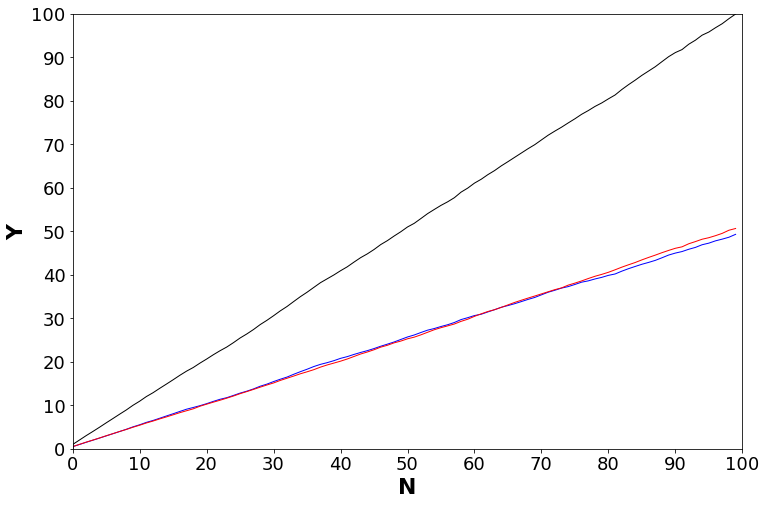

In [7]:
# 1. Initialisatie
N=100  # aantal stappen in de RW
M=10000   # aantal kopiën in het ensemble

dx=np.array([1,-1,0,0])
dy=np.array([0,0,1,-1])

xpos=np.zeros((M,N+1))
ypos=np.zeros((M,N+1))
ravg=np.zeros(N+1)
r2avg=np.zeros(N+1)
x2avg=np.zeros(N+1)
y2avg=np.zeros(N+1)
Xcoord=np.zeros(N+1)
# 2. Lus over alle ensemble elementen
for i in range(M):
    x=0    # start positie
    y=0
    # 2.1. Lus over alle stappen van 1 Random walk
    for j in range(N):
        Rn=np.random.randint(4) # random integer van 0..3 ==> gelijke kans voor elke richting
        x+=dx[Rn]
        y+=dy[Rn]
        xpos[i,j+1]=x
        ypos[i,j+1]=y
        r2=x**2+y**2
        r2avg[j+1]+=r2       # we tellen eerst alle r2 en r binnen het ensemble op (een r en r2 voor elk stappenaantal N)
        ravg[j+1]+=np.sqrt(r2)  # straks nog delen door M
        x2avg[j+1]+=x**2
        y2avg[j+1]+=y**2
        
# 2.2 Uitmiddelen van ensemble eigenschappen        
for j in range (N):
    Xcoord[j+1]=j
    ravg[j+1]/=M
    r2avg[j+1]/=M
    x2avg[j+1]/=M
    y2avg[j+1]/=M
        
# 3. Plotje maken van de resultaten
plt.figure(figsize=(12,8))
plt.plot(Xcoord, x2avg,  color='blue',linewidth=1, zorder=0)
plt.plot(Xcoord, y2avg,  color='red',linewidth=1, zorder=0)
plt.plot(Xcoord, r2avg,  color='black',linewidth=1, zorder=0)

min_x=min(np.min(xpos),np.min(ypos))-1
max_x=max(np.max(xpos),np.max(ypos))+1
plt.axis([0,N,0,N])
XYlst=np.linspace(0,N,int(N/10)+1)
plt.xticks(XYlst,fontsize=18)
plt.yticks(XYlst,fontsize=18)
plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("Y",fontsize=22,fontweight="bold")
plt.show()

## 3D Random Walk ##
Het verschil tussen een 2D en een 3D Random walk is programmatorisch relatief beperkt. Het hoofdzakelijke verschil zit in de aanwezigheid van een derde coordinaat. De scripts van hierboven kunnen dus grotendeels overgenomen worden en dienen enkel hierop aangepast te worden. Visualisatie van een 3D afbeelding vraagt wat extra werk.

De eerstvolgende cel bevat een script voor één enkele Random Walk, terwijl de tweede cel terug een ensemble genereert.

In [ ]:
## Eén enkele Random Walk
##-----------------------
#0. Deze regel laat je toe de 3D afbeelding in het notebook te roteren :-)
%matplotlib notebook
#1. Initialisatie
x=0    # start positie
y=0
z=0
N=1000  # aantal stappen in de RW

dx=np.array([1,-1,0,0,0,0])  # in 3D heb je 6 mogelijke staprichtingen
dy=np.array([0,0,1,-1,0,0])
dz=np.array([0,0,0,0,1,-1])

xpos=np.zeros(N+1)
ypos=np.zeros(N+1)
zpos=np.zeros(N+1)
#2. De Random Walk 
for j in range(N):
    Rn=np.random.randint(6) # random integer van 0..5 ==> gelijke kans voor elke richting
    x+=dx[Rn]
    y+=dy[Rn]
    z+=dz[Rn]
    xpos[j+1]=x
    ypos[j+1]=y
    zpos[j+1]=z

#3. 3D plotje
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(xpos, ypos, zpos, 'gray')
ax.scatter3D(xpos[0], ypos[0], zpos[0], c='red')
ax.scatter3D(xpos[-1], ypos[-1], zpos[-1], c='green')
plt.show()

In [ ]:
## Een ensemble van Random Walks
##-------------------------------
# 0. Deze regel laat je toe de 3D afbeelding in het notebook te roteren :-)
%matplotlib notebook
#1. Initialisatie Ensemble van 3D RWs
N=100  # aantal stappen in de RW
M=1000   # aantal RWs in het ensemble

### 2. ISOTROPE beweging
dx=np.array([1,-1,0,0,0,0])
dy=np.array([0,0,1,-1,0,0])
dz=np.array([0,0,0,0,1,-1])

xpos=np.zeros((M,N+1))
ypos=np.zeros((M,N+1))
zpos=np.zeros((M,N+1))
# 2.1. Lus over het ensemble
for i in range(M):
    x=0    # start positie
    y=0
    z=0
    # 2.2. Lus over alle stappen van 1 RW
    for j in range(N):
        Rn=np.random.randint(6) # random integer van 0..5 ==> gelijke kans voor elke richting
        x+=dx[Rn]
        y+=dy[Rn]
        z+=dz[Rn]
        xpos[i,j+1]=x
        ypos[i,j+1]=y
        zpos[i,j+1]=z

### 3. ANISOTROPE beweging (i.e. met voorkeursrichtingen of verschillende mesh-size/stapgrootte) 
dx=np.array([1,-1,0,0,0,0])
dy=np.array([0,0,0.2,-0.2,0,0])
dz=np.array([0,0,0,0,5,-5])

AXL=int(np.sqrt(N*25)*1.25)
xpos2=np.zeros((M,N+1))
ypos2=np.zeros((M,N+1))
zpos2=np.zeros((M,N+1))
# 3.1. Lus over ensemble
for i in range(M):
    x=0    # start positie
    y=0
    z=0
    # 3.2. Lus over alle stappen van 1 RW
    for j in range(N):
        Rn=np.random.randint(6) # random integer van 0..5 ==> gelijke kans voor elke richting
        x+=dx[Rn]
        y+=dy[Rn]
        z+=dz[Rn]
        xpos2[i,j+1]=x
        ypos2[i,j+1]=y
        zpos2[i,j+1]=z

# 4. 3D plot van het geheel
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_xlim3d([-AXL, AXL])
ax.set_xlabel('X')
ax.set_ylim3d([-AXL, AXL])
ax.set_ylabel('Y')
ax.set_zlim3d([-AXL, AXL])
ax.set_zlabel('Z')

# 4.1. Data voor 3D pad
for i in range(M):
    ax.plot3D(xpos[i,:], ypos[i,:], zpos[i,:], 'gray',alpha=0.01)
    ax.plot3D(xpos2[i,:], ypos2[i,:], zpos2[i,:], 'red',alpha=0.01)
#for i in range(M):
#    ax.scatter3D(xpos[i,:], ypos[i,:], zpos[i,:], c='grey', alpha=0.01);
#    ax.scatter3D(xpos2[i,:], ypos2[i,:], zpos2[i,:], c='red', alpha=0.01);

# 4.2. Een extra functie om een animatie te kunnen maken    
def update(i):
    #hoeken zijn in graden
    rot=3*i
    #sinf=np.sin(rot*np.pi/180.0)
    ax.view_init(elev=20., azim=rot)
      
# 4.3. 3D animatie om op te slaan
anim = FuncAnimation(fig, update, frames=np.arange(0, 120), interval=20)
# Volgende regel uncommenten om dit op te slaan als een gif-animatie
#anim.save('3D_RW.gif', dpi=80, writer='imagemagick')

# 4.4. En de animatie plotten naar het scherm
plt.show()